<a href="https://colab.research.google.com/github/fedhere/MLPNS2021/blob/main/CART/higgs_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For MLPNS20201 written by @fedhere

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import pandas as pd
import json
import os
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# data acquisition

In [88]:
pip install kaggle

In [89]:
cd /content/drive/My Drive/MLPNS2021

/content/drive/My Drive/MLPNS2021


In [90]:
#delete
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [91]:
#delete
!rm -r higgsb
!mkdir higgsb



In [92]:
cd higgsb/


/content/drive/My Drive/MLPNS2021/higgsb


In [93]:
!pwd

/content/drive/My Drive/MLPNS2021/higgsb


In [94]:
!kaggle competitions download -c higgs-boson

  0% 0.00/3.15k [00:00<?, ?B/s]
100% 3.15k/3.15k [00:00<00:00, 507kB/s]
  0% 0.00/2.58M [00:00<?, ?B/s]
100% 2.58M/2.58M [00:00<00:00, 42.2MB/s]
 95% 33.0M/34.8M [00:00<00:00, 102MB/s] 
100% 34.8M/34.8M [00:00<00:00, 99.9MB/s]
 41% 7.00M/16.9M [00:00<00:00, 72.5MB/s]
100% 16.9M/16.9M [00:00<00:00, 81.8MB/s]


In [95]:
!unzip test.zip 
!unzip training.zip

Archive:  test.zip
  inflating: test.csv                
Archive:  training.zip
  inflating: training.csv            


In [96]:
data = pd.read_csv("training.csv")


In [97]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [98]:
data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [99]:
#pd.plotting.scatter_matrix(data)


- Split the provided training data into a training and a test set. For each model calculate and discuss the training and test score results.

 the last 2 columns are what you want to predict: "weight" and "label"



In [100]:
labels = data[["Label"]]
ranks = data[["Weight"]]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


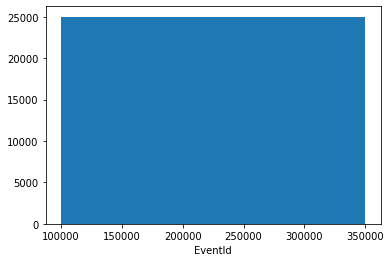

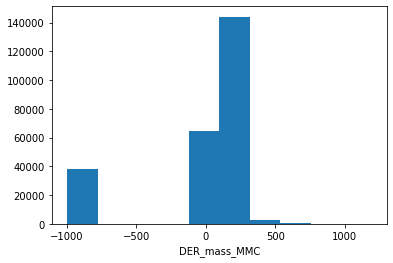

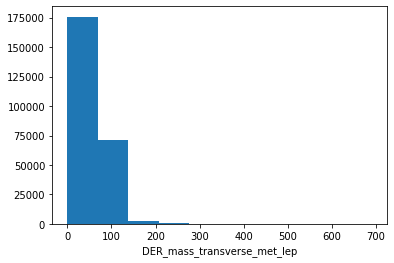

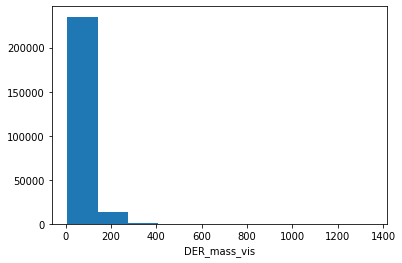

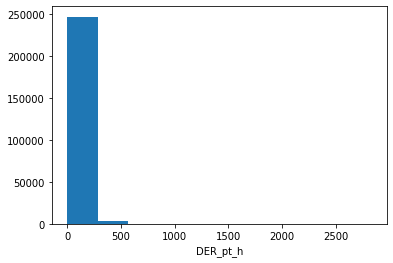

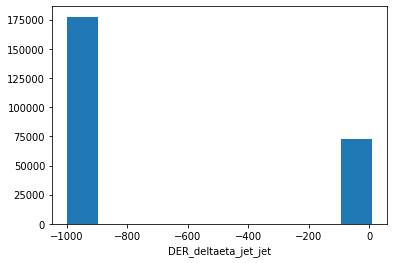

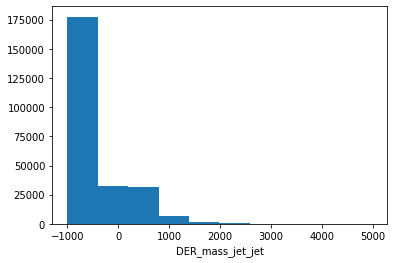

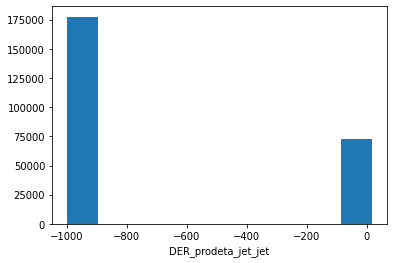

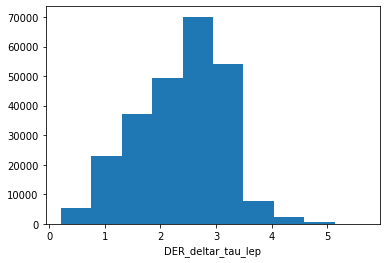

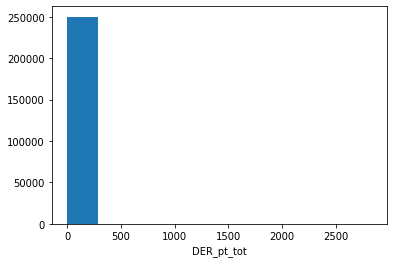

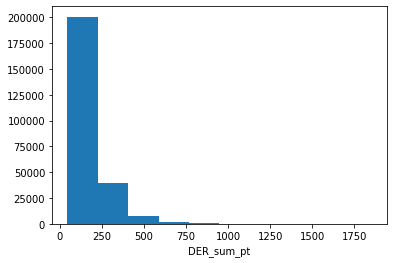

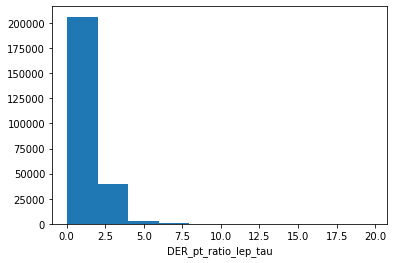

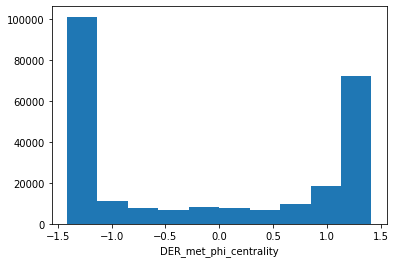

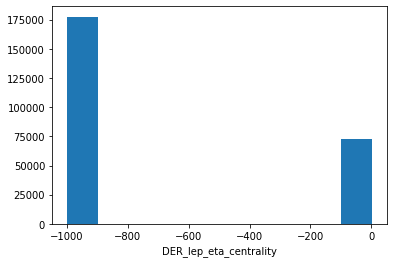

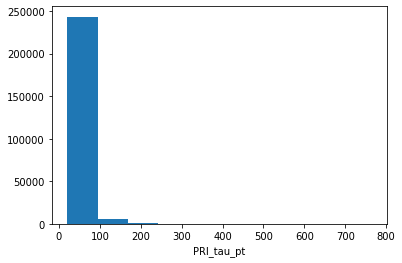

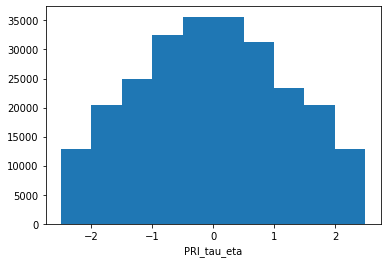

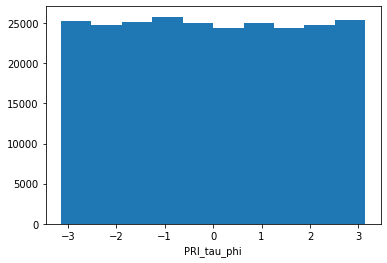

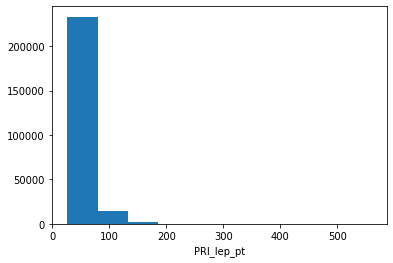

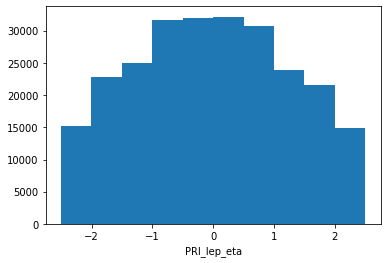

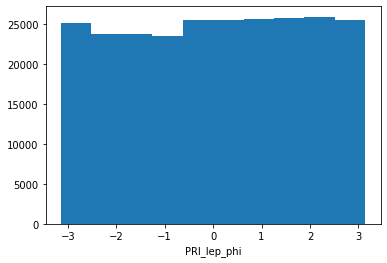

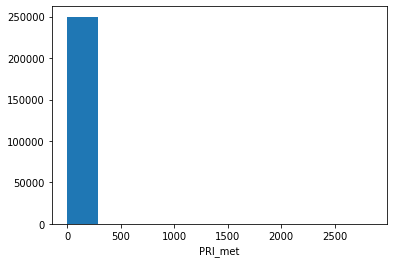

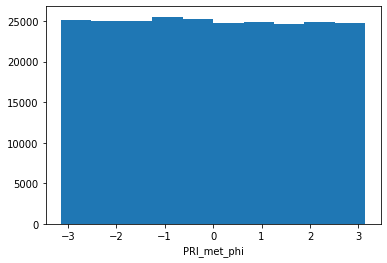

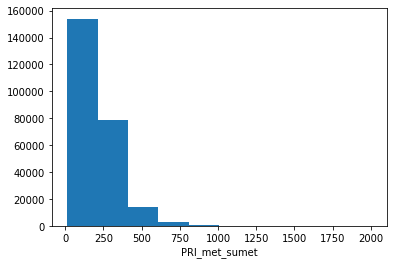

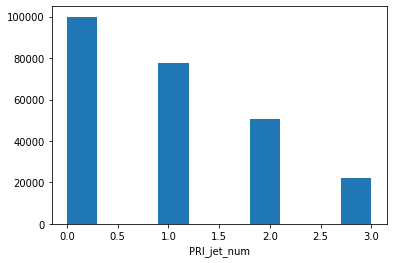

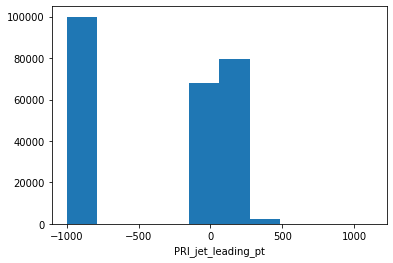

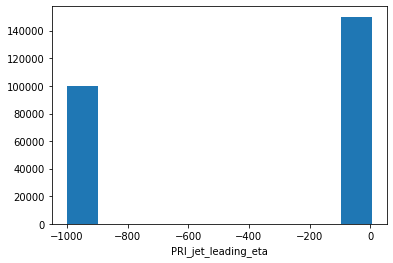

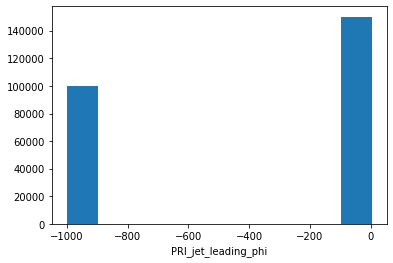

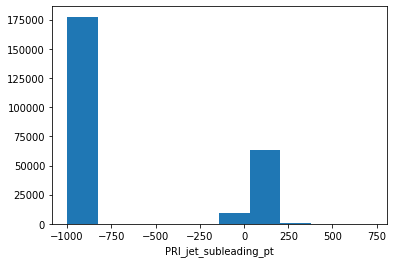

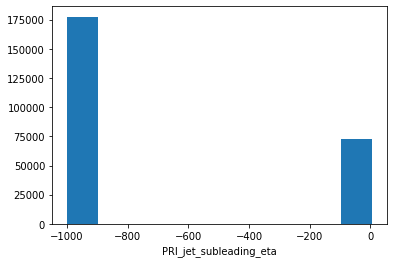

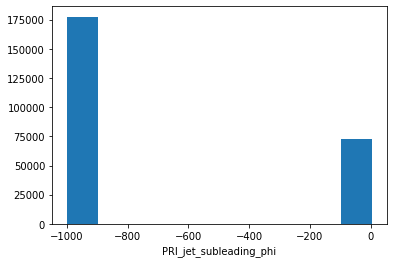

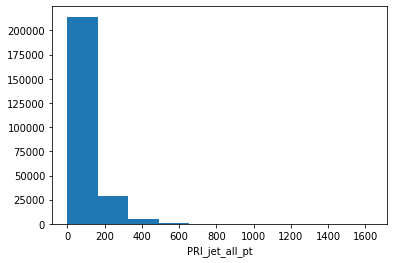

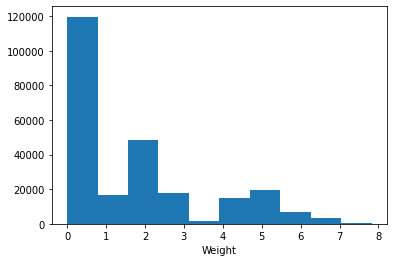

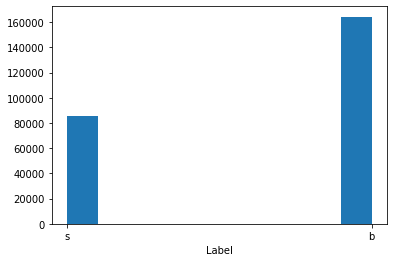

In [101]:
for c in data.columns:
  pl.figure()
  pl.hist(data[c])
  pl.xlabel(c)

You should worry about the class imbalange (last distribution) and about the -999 entried (clearly they are used to indicate NaN values)

In [102]:
data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [103]:
data = data.replace(-999, np.nan)

In [104]:
data.isna().sum()

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

In [105]:
data = data.dropna(axis=1)

In [106]:
# leave
from sklearn.model_selection import train_test_split 

In [107]:
traindata, testdata, train_label, test_label = train_test_split(data[data.columns[1:-2]],
                                labels, train_size=0.75, test_size=0.25, random_state=1)

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from pprint import pprint

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [109]:
gbt = GradientBoostingClassifier(random_state = 0)

In [110]:
rf.fit(traindata, train_label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [111]:
gbt.fit(traindata, train_label)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

scores and evaluation of overtraining

In [112]:
rf.score(traindata, train_label), rf.score(testdata, test_label)

(0.999984, 0.826576)

In [113]:
gbt.score(traindata, train_label), gbt.score(testdata, test_label), 

(0.8205546666666667, 0.81744)

The RF is better on the training data, but it is an illusion. it is overfitting as is evident by the fact that the performance is inferior on the test data than on the training data. GBT performs just as well on the testing data without overfitting

- Produce a confusion matrix for each model and compare them


 



In [114]:

from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=True,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    pl.imshow(cm, cmap=cmap)
    pl.text(0,0, "%d"%cm[0][0])
    pl.text(1,1, "%d"%cm[1][1])
    pl.text(0,1, "%d"%cm[1][0], color="w", ha="center")
    pl.text(1,0, "%d"%cm[0][1], color="w", ha="center")
    pl.xticks([0,1], labels=["N", "P"])
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    pl.colorbar()
    #pl.axis('off')

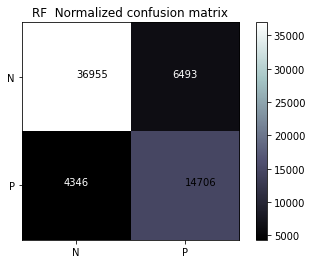

In [115]:

plot_confusion_matrix(rf.predict(testdata), 
                      test_label,
                      title="RF ")

thousands of  False poisitves and False negatives is clearly bad! the accuracy is dominated by the class imbalance, but the rare events may be missed!

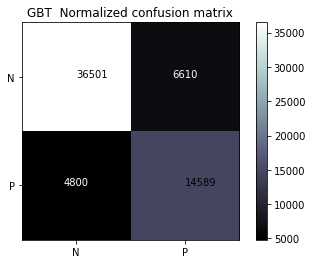

In [116]:
plot_confusion_matrix(gbt.predict(testdata), 
                      test_label,
                      title="GBT ")

similar performance for both models


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [117]:
traindata2, testdata2, train_ranks, test_ranks = train_test_split(data[data.columns[1:-2]],
                                ranks, train_size=0.75, test_size=0.25, random_state=1)

In [118]:
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rf2.fit(traindata2, train_ranks)  
print(rf2.feature_importances_)
#[0.14205973 0.76664038 0.0282433  0.06305659]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.34215823 0.         0.05086311 0.         0.00755318 0.0176836
 0.         0.         0.02206185 0.         0.         0.
 0.         0.         0.         0.         0.         0.04790643
 0.5117736 ]


In [119]:
rf2.predict(testdata2)

array([1.0416461 , 0.93019922, 1.92966471, ..., 0.43503809, 1.97828446,
       2.83394082])

In [120]:
print("L2 RF {:.1f}".format(((rf2.predict(testdata2) - test_ranks.values.flatten())**2).sum()))

L2 RF 115851.1


In [121]:

print("L1 RF {:.1f}".format(((np.abs(rf2.predict(testdata2) - test_ranks.values.flatten())).sum())))


L1 RF 63240.3


In [122]:
from sklearn.ensemble import GradientBoostingRegressor 
gbt2 = GradientBoostingRegressor(random_state=0)
gbt2.fit(traindata2, train_ranks)  
print(gbt2.feature_importances_)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2.92550018e-01 6.67362679e-02 4.55961519e-02 2.95793221e-02
 1.25082539e-02 9.71070434e-02 6.86037362e-03 4.84976968e-02
 6.30954667e-02 1.44357188e-03 0.00000000e+00 2.09665144e-04
 2.02500138e-03 0.00000000e+00 5.11620295e-03 0.00000000e+00
 3.43472152e-02 1.20425610e-02 2.82285188e-01]


In [123]:
print("L2 GBT {:.1f}".format(((gbt2.predict(testdata2) - test_ranks.values.flatten())**2).sum()))

L2 GBT 87487.4


In [124]:
print("L1 GBT {:.1f}".format(((np.abs(gbt2.predict(testdata2) - test_ranks.values.flatten())).sum())))


L1 GBT 53971.2


In [125]:
print("RF score from sklearn {:.1f}".format(rf2.score(testdata, test_ranks.values)))

RF score from sklearn 0.5


- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on and explore the parameter space with the sklearn module sklearn.model_selection.RandomizedSearchCV fitting only those 4 features

 



In [126]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [127]:
rf.predict(testdata)

array(['s', 'b', 's', ..., 's', 'b', 'b'], dtype=object)

In [128]:
best_features = rf.feature_importances_[np.argsort(rf.feature_importances_)[-4:]]

In [129]:
traindata2.iloc[:, best_features]

,DER_mass_transverse_met_lep,DER_mass_transverse_met_lep,DER_mass_transverse_met_lep,DER_mass_transverse_met_lep
168601,78.176,78.176,78.176,78.176
247644,51.736,51.736,51.736,51.736
205247,54.941,54.941,54.941,54.941
233035,47.390,47.390,47.390,47.390
239886,84.896,84.896,84.896,84.896
...,...,...,...,...
229119,41.162,41.162,41.162,41.162
5192,18.385,18.385,18.385,18.385
208780,70.622,70.622,70.622,70.622
229611,29.671,29.671,29.671,29.671


In [131]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [10,100,1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3,10,100]
max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
##min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
               }
pprint(random_grid)


{'max_depth': [3, 10, 100, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 100, 1000]}


In [132]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# n_iter is the sampling along each axis, and use all available cores
random_search = RandomizedSearchCV(
    estimator = rf, param_distributions=random_grid, random_state=123, verbose=3,
                                   n_iter=15, cv=4, iid=False, n_jobs=-1)


I am going to run the parameter search on the test set, whcih is a bit smaller, so it will save some time. 

in principle, if my sliptting training and testing was correct (unbiased) it should not matter much

A lareger dataset is always better, but .... this is just an exercise and it is taking long enough to run the searc on the test set.

In [ ]:
from time import time
start = time()
random_search.fit(traindata, train_label)


In [134]:
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), -1))


RandomizedSearchCV took 10875.00 seconds for -1 candidates parameter settings.


In [ ]:
df = pd.DataFrame(random_search.cv_results_)
df

In [138]:
pwd

'/content/drive/My Drive/MLPNS2021/higgsb'

In [139]:
#df.to_csv("rshiggs.csv")
#df = pd.read_csv("rshiggs.csv")
df

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0,284.643157,18.229567,5.292760,0.273032,1000,sqrt,3.0,"{'n_estimators': 1000, 'max_features': 'sqrt',...",0.754773,0.756096,0.758037,0.753749,0.755664,0.001603,14
1,1,1229.773433,33.064978,26.977832,3.824799,1000,auto,NaN,"{'n_estimators': 1000, 'max_features': 'auto',...",0.830016,0.830528,0.827989,0.828715,0.829312,0.001010,1
2,2,13.935375,0.269103,0.384924,0.056604,10,sqrt,NaN,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.809707,0.808619,0.809365,0.806443,0.808533,0.001270,9
3,3,13.368012,0.108826,0.415319,0.042071,10,auto,NaN,"{'n_estimators': 10, 'max_features': 'auto', '...",0.809707,0.808619,0.809365,0.806443,0.808533,0.001270,9
4,4,13.595046,0.404268,0.406462,0.041499,10,sqrt,100.0,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.809707,0.808619,0.809365,0.806443,0.808533,0.001270,9
5,5,810.877282,40.830455,11.247375,0.201210,1000,auto,10.0,"{'n_estimators': 1000, 'max_features': 'auto',...",0.819605,0.819541,0.818432,0.817643,0.818805,0.000817,5
6,6,80.860138,1.812909,1.134509,0.110432,100,auto,10.0,"{'n_estimators': 100, 'max_features': 'auto', ...",0.819499,0.818944,0.818389,0.816405,0.818309,0.001167,7
7,7,742.894756,33.212613,9.213411,0.246475,1000,sqrt,10.0,"{'n_estimators': 1000, 'max_features': 'sqrt',...",0.819605,0.819541,0.818432,0.817643,0.818805,0.000817,5
8,8,23.499705,0.287080,0.581356,0.021541,100,sqrt,3.0,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.757653,0.758528,0.761877,0.757696,0.758939,0.001732,13
9,9,2.708144,0.089497,0.204312,0.006130,10,sqrt,3.0,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.734251,0.739989,0.739712,0.734592,0.737136,0.002719,15


In [146]:
random_search.best_params

"{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 100}"

In [149]:
rf_bf = RandomForestClassifier(random_search.best_params_)
rf_bf.fit(traindata, train_label.values.flatten()=="s")

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

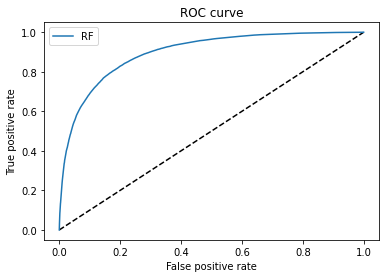

In [150]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf_bf.predict_proba(testdata)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_label.values.flatten()=="s", y_pred_grd_rfcat)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
